# 통계

Last updated 20191029TUE0000

목차
* S.2 변수의 성격
* S.3 샘플링
* S.4 균등분포
* S.5 정규분표

* S.6 central tendency and spread
* S.7 variability
* S.8 Z score
* S.9 outlier
Kolmogorov-Smirnov 검증
문제 S-3: 평균, 표준편차와 같은 기본 통계 값을 구한다.
ANOVA
* Chi
* S.10 상관관계
* S.10.1 상관관계 방향과 강도
* S.10.2 그래프
* S.10.3 상관관계 식
* S.4.2 데이터
* S.4.3 평균 계산
* S.4.4 분산 계산
* S.4.5 numpy 공분산 계산
* S.4.6 sklearn
* S.4.7 zscore를 이용한 상관관계
* S.5 함수로 만들어 보기
* S.6 상관관계 표
* S.7 Iris


In [ ]:
Chi square???

## S.2 변수의 성격

변수는 크게 나누어 **숫자**, **문자** 값으로 구분할 수 있다.
숫자 값은 정수나 소수로 표현되고, 년봉, 매출액, 관객수와 같이 '크다' 또는 '작다' 하는 의미가 있다.

**명목변수 Categorical or nominal varaible**는 남녀 성별과 같이 **순서가 없이** 이름이 있는 변수를 말한다.
자동차 색과 같이 검은색, 흰색, 파란색이 예가 된다. 사는 지역의 도별 인구수를 계산하는 경우, 종로구, 영등포구 등 구를 명목변수라고 한다.

**순위변수 Ordinal variable**은 어떤 **순서가 있는** 범주에 속하여 그 범주의 이름을 말한다.
'초등학고', '중학교', '고등학교', '대학교'와 같이 구분하여 붙인 이름이 예가 되고, 하위 학교를 마치고 나면 다음 등급으로 진학하는 순서가 있다.
소득수준을 '차상위', '중위', '상위'로 구분하면 **순위변수**에 해당된다.

여기서 범주를 **등간격**으로 **간격변수 Internal variable**이라고 한다.
자신의 느낌을 '좋다', '보통', '안좋다' 로 범주화하는 경우이다.

키, 몸무게와 같이 **연속 변수 Continuous variable**이 있다.

## S.3 샘플링

무작위 데이터를 생성해 보자.

무작위 수는 math.random을 사용해서 생성할 수 있다.
그러나 math.random은 완전하게 무작위 수를 생성하지 않는다.
randmo.seed()를 제공하면 이 수를 기반으로 무작위 수를 생성하지만, 전과 동일한 수가 생성된다.
seed를 주지 않으면 운영체제 시간을 사용하므로 무작위 수를 생성하게 된다.

In [13]:
import random 
#random.seed()
random.seed(3)
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.23796462709189137
2nd random number on the basis of the seed 0.5442292252959519


다시 한 번 동일한 seed를 제공하고 무작위 수를 생성하면 이전의 수와 동일한 무작위 수가 생성된다.

In [14]:
#random.seed()
random.seed(3)
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.23796462709189137
2nd random number on the basis of the seed 0.5442292252959519


이번에는 numpy를 사용하여 무작위 배열을 생성해 보자.
random() 함수에 숫자를 주면 배열로 생성이 된다.

In [24]:
import numpy as np
print (np.random.random( (3,2) ))

[[0.6762549  0.59086282]
 [0.02398188 0.55885409]
 [0.25925245 0.4151012 ]]


또는 분포를 가정하고, 무작위 표본 Sample을 추출할 수 있다.
* numpy.random.rand는 Uniform 분포
* numpy.random.randn은 표준정규분포 (평균 0, 분산 1)에서 샘플을 추출한다.
따라서, sigma * np.random.randn(...) + mu는
np.random.normal(loc= mu, scale= sigma, ...)와 같이 모두 정규분포을 사용한다.

In [23]:
np.random.randn()

0.43650985051198943

In [ ]:
np.random.random_sample, random.sample 모두 균등분포에서 표본을 추출한다.

In [15]:
print (np.random.random_sample( (3,2) ))

[[0.95432113 0.77242561]
 [0.60615242 0.15974085]
 [0.44407345 0.31351612]]
[[0.26020857 0.71863744]
 [0.98307878 0.16916068]
 [0.53600492 0.65946691]]


In [ ]:
random.sample(population, k) - 모집단에서 (정수)샘플 K 개 돌려줌 (바꿔치기 안함)

In [2]:
import random
print (random.sample([1,2,3,4,6], 2))
print (random.sample([1,2,3,4,6], 3))

[4, 3]
[3, 1, 2]


## S.4 균등 분포 uniform distribution

주사위를 던져 나오는 수는 1~6, 이를 시뮬레이션

### sampling

균등분포로 수를 생성해 보자.

In [ ]:
# randmo sampling
dice=[]
for i in range(100):
   dice.append(random.randrange(1,6+1))

print (dice)

### histogram

각 빈도수가 몇 개인지 세어보자.

In [32]:
# bin의 수가 10개라서 주사위 6개가 아님.
for i in range(1,7):
   print(dice.count(i))

15
13
14
19
20
19


In [ ]:
각 사건의 발생건수를 히스토그램으로 그려보자.
앞서 생성하였던 dice를 인자로 넘겨준다.

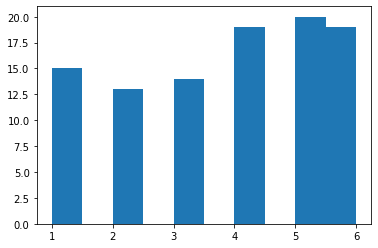

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(dice)
plt.show()

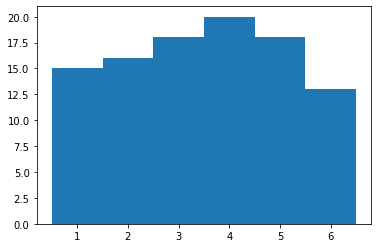

In [8]:
import numpy as np
#bin은 구간. 즉 0.5~1.5 구간에는 14개.
plt.hist(dice, np.arange(0.5,7.5))
plt.show()

In [ ]:
numpy array는 pandas의 Series로 쉽게 변환된다.

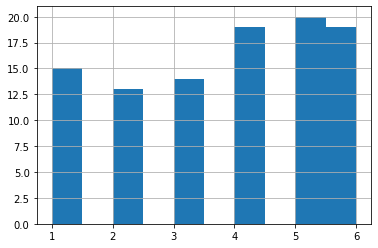

In [31]:
import pandas as pd
pd.Series(dice).hist()

### describe

통계량을 구해보자. describe()는 기술통계 값인 평균, 최소값, 최대값, 표준편차, 건수를 출력한다.

In [9]:
import pandas as pd
s=pd.Series(dice)
print (s)
print (s.describe())

0     5
1     1
2     6
3     5
4     3
     ..
95    6
96    3
97    2
98    6
99    5
Length: 100, dtype: int64
count    100.000000
mean       3.490000
std        1.623657
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max        6.000000
dtype: float64


## 문제: histogram

* histogram은 barchart과 성격이 다름
* histogram은 한 변수(컬럼)의 빈도수.
* barchart는 두 변수간의 그래프.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

data = """0 14-11-2003
1 15-03-1999
12 04-12-2012
33 09-05-2007
44 16-08-1998
55 25-07-2001
76 31-12-2011
87 25-06-1993
118 16-02-1995
119 10-02-1981
145 03-05-2014"""

In [2]:
values = []
dates = []
for line in data.split("\n"):
    x, y = line.split()
    values.append(int(x))
    dates.append(datetime.datetime.strptime(y, "%d-%m-%Y").date())

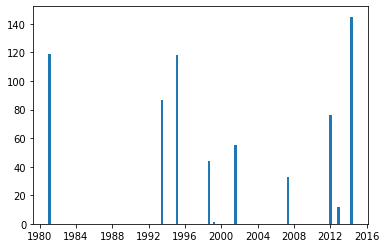

In [7]:
fig = plt.figure()
ax = plt.subplot(111)
ax.bar(dates, values, width=100)
ax.xaxis_date()

In [8]:
# or
width=0.8
ax.bar(range(len(dates)), values, width=width)
ax.set_xticks(np.arange(len(dates)) + width/2)
ax.set_xticklabels(dates, rotation=90)

[Text(721354.0, 0, '2003-11-14'),
 Text(722815.0, 0, '1999-03-15'),
 Text(724276.0, 0, '2012-12-04'),
 Text(725737.0, 0, '2007-05-09'),
 Text(727198.0, 0, '1998-08-16'),
 Text(728659.0, 0, '2001-07-25'),
 Text(730120.0, 0, '2011-12-31'),
 Text(731581.0, 0, '1993-06-25'),
 Text(733042.0, 0, '1995-02-16'),
 Text(734503.0, 0, '1981-02-10'),
 Text(735964.0, 0, '2014-05-03')]

## S.5 정규분포



### Sampling

무작위 변수 x가 있다고 하자. x는 정규분포를 따른다고 하며,
평균 $\mu$, 표준편차 $\sigma$를 가지게 된다.
즉, $ X \sim N (\mu, \sigma)$
무작위 수를 생성하는 함수는:
* random.gauss(mu,sigma)
* random.normalvariate(mu,sigma) - gauss보다 약간 빠름.

참고로 다른 분포에서의 샘플링 함수는 다음과 같다.
* random.uniform(a,b)
* random.betavariate(alpha,beta)
* random.expovariate(lamdb)
* random.gammavariate(alpha,beta)


In [1]:
import numpy as np
comp1=np.random.normal(0,1,size=200)

In [2]:
comp2=np.random.normal(10,2,size=200)

또는 randn을 사용할 수 있다.
histogram은 bin(interval)과 bin에 속하는 값을 반환한다.
100개의 수를 무작위로 생성한다.
`histogram(x)`를 실행하면 2개의 행렬이 반환된다.
각 빈에 속한 갯수, 그리고 x축의 간격.
즉 -2.23 ~ -1.67 첫 째 빈(간격)에는 2개의 빈도가 있다는 것을 의미.
numpy의 `histogram()`은 그래프를 생성하지 않으므로,
그림을 그리려면 `hist(x)`를 실행한다.

In [3]:
x=np.random.randn(100)

### histogram



In [4]:
count, binends = np.histogram(x)

print(count)
print(binends)

[ 1  8 13 20 16 11 13  5  8  5]
[-2.24264942 -1.78481805 -1.32698669 -0.86915532 -0.41132395  0.04650741
  0.50433878  0.96217015  1.42000151  1.87783288  2.33566425]


(array([ 1.,  8., 13., 20., 16., 11., 13.,  5.,  8.,  5.]),
 array([-2.24264942, -1.78481805, -1.32698669, -0.86915532, -0.41132395,
         0.04650741,  0.50433878,  0.96217015,  1.42000151,  1.87783288,
         2.33566425]),
 <a list of 10 Patch objects>)

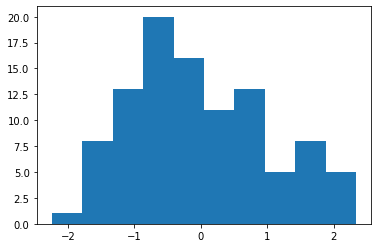

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(x)

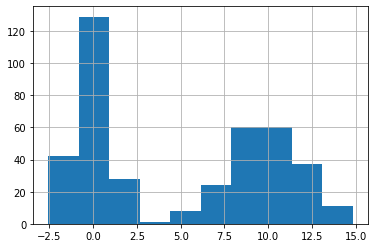

In [7]:
import pandas as pd

values=pd.Series(np.concatenate( [comp1,comp2]))
values.hist()

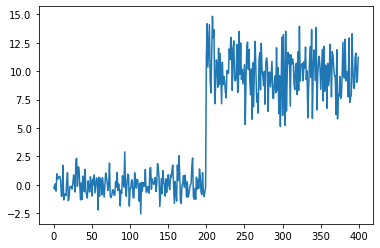

In [8]:
values.plot()
plt.show()

## 3.2 central tendency and spread

정규분포는 평균, 모드, 최빈값이 같다.

무작위 평균 $\mu$, 표준편차 $\sigma$인 변수 X가 주어지면, 
그러면 X의 모집단이 어떤 분포를 따르더라도, n이 커지면 X는 

식으로 표현하면:

$$
z = \frac {\bar{x} - \mu_0} {\sigma / \sqrt{n}} \quad x \rightarrow \infty
$$


* standard error
모집단의 표준편차는 알 수가 없다. 따라서 다음과 같이 계산한다. 이때 n이 커지면 보통 30
$ \frac{\sigma} {\sqrt{n}}$

* skewness
    * skewness = 0 : normally distributed.
    * skewness > 0 : more weight in the left tail of the distribution.
    * skewness < 0 : more weight in the right tail of the distribution.
* kurtosis 분포의 꼬리 모양을 말해준다.
    * = 0 : normal
    * > 0 : peaked, thick tails
    * < 0 : flat, thin tails

In [15]:
from scipy.stats import skew, kurtosis
x=np.random.randn(100)
print ("skewness\t: {}".format(skew(x)))
print ("kurtosis\t: {}".format(kurtosis(x)))
print ("mean\t: {}".format(np.mean(x)))
print ("median\t: {}".format(np.median(x)))

skewness	: 0.1887525973693077
kurtosis	: -0.17662677726466303
mean	: -0.09913876574559062
median	: -0.09856731604927932


### Spark로 skewness, kurtosis 계산하기

In [16]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [17]:
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

Pandas를 경유해서 numpy array를 DataFrame으로 생성하자.

In [35]:
import pandas as pd
xPd=pd.DataFrame(x, columns=['x'], dtype=float)

In [51]:
df=spark.createDataFrame(xPd)

In [52]:
from pyspark.sql import functions as f
df.select(f.skewness(df['x']), f.kurtosis(df['x'])).show()

+-------------------+--------------------+
|        skewness(x)|         kurtosis(x)|
+-------------------+--------------------+
|0.18875259736930788|-0.17662677726466303|
+-------------------+--------------------+



## 3.3 variability

spread
    * range
        * IQR Interquartile Range
    * variance
    * standard deviation

```
var의 sqrt는 std
default는 ddof=1(모집단 크기 N을 사용)
표본 n을 사용하려면 ddof=1을 넘겨 준다.

In [53]:
np.std(x)

1.0140797042189178

In [54]:
np.var(x)

1.0283576465087279

In [55]:
np.var(x,ddof=0)

1.0283576465087279

In [56]:
np.sqrt(np.var(x))

1.0140797042189178

In [57]:
np.std(x,ddof=1)

1.019188450426889

In [58]:
np.sqrt(np.var(x,ddof=1))

1.019188450426889

In [59]:
a = np.array([1,2,3,4,5])
p = np.percentile(a, 50) # return 50th percentile, e.g median.
print (p) # 3


3.0


In [ ]:
```
x = df.select(var).toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x)

ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x)
```

### boxplot

IQR의 Q1~Q3을 표시.
pandas를 이용하거나, matplotlib

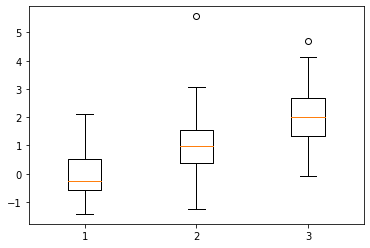

In [60]:
x1 = np.random.normal(0,1,50)
x2 = np.random.normal(1,1,50)
x3 = np.random.normal(2,1,50)
plt.boxplot([x1,x2,x3])
plt.show()


## 3.4 zscore and tscore

zscore는 평균에서 얼마나 떨어져 있는지를 말한다.
정규화(표준화)한다는 정도의 의미가 있다.
즉, z=-0.84일 경우 20%정도에 해당한다.
정규분포일 경우 특정 값의 z값을 말한다.
cdf는 누적확률을 말하는 것으로, cdf(0)은 '0'또는 그 이하의 값을 누적한 확률을 말한다.
평균과 표준편차는 0,1을 기본 값으로 한다.

z는 모집단의 평균, 표준편차를 알 경우, 그러나 샘플링을 할 경우는 
n-1로 나눈다 (numpy에서는 ddof=1이 default).
따라서 아래 계산에서는 ddof=1로 한다. 
표본의 크기가 크면 모집단과 차이가 없는데, 이 경우 표본이 작으면 어떻게 되나..
이 경우 사용하는 것이 t

t값은 
T score is usually used when the sample size is below 30 and/or
when the population standard deviation is unknown.


>>> stats.norm.cdf(-0.84)
0.20045419326044966
>>> stats.norm.cdf(0)
0.5
>>> stats.norm.cdf(1)
0.84134474606854293
>>> stats.norm.cdf(2)
0.97724986805182079 

>>> stats.norm.cdf(2, loc=0.0, scale=1.0)
0.97724986805182079

// 뒤 1은 degree of freedom
>>> stats.t.cdf(1,1)
0.75000000000000022
>>> stats.t.cdf(1,1,loc=0,scale=1)
0.75000000000000022


모집단의 zscore when variance is known
$$
z = \frac {\bar{x} - \mu_0} {\sigma / \sqrt{n}}
$$

모집단의 variance $\sigma^2$를 모르는 경우,
샘플(n < 20 정도)을 구해 그 샘플의 $s^2$를 사용
(과소값을 막기 위해 n-1로 나누는 보정계수 사용)
(n이 적으므로 t값을 사용함!)

```
>>> X
[10, 7, 12, 12, 9, 16, 12, 18, 8, 12, 14, 16]
>>> xbar=mean(X)
>>> sigmax=std(X)
>>> sx=std(X,ddof=1)
>>> xbar
12.166666666666666
>>> sigmax
3.2360813064912666
>>> sx
3.3799766898963113
>>> for x in X:
...   zscore=(x-xbar)/sx
...   print zscore,
... 
 -0.641030061877 -1.52861014755 -0.0493100047598 -0.0493100047598
 -0.936890090435 1.13413010947 -0.0493100047598 1.72585016659
 -1.23275011899 -0.0493100047598 0.542410052357 1.13413010947
>>> stats.zscore(X)
array([-0.66953406, -1.59658123, -0.05150262, -0.05150262, -0.97854978,
        1.18456027, -0.05150262,  1.80259171, -1.28756551, -0.05150262,
        0.56652882,  1.18456027])
>>> for x in X:
...   zscore=(x-xbar)/sigmax
...   print zscore,
... 
 -0.669534063412 -1.59658122814 -0.0515026202625 -0.0515026202625
 -0.978549784987 1.18456026604 -0.0515026202625 1.80259170919
 -1.28756550656 -0.0515026202625 0.566528822887 1.18456026604


```

## 3.5 outliers

정규분포를 따른다고 했을 경우, 분포의 표준편차 범위3은 발생하기 어렵다.
이러한 일정 범위를 넘어선 값은 이상값이다.
따라서, 이런 경우 분석에 앞서 왜 그런 값이 발생했는지 따져보아야 한다.

연구에서는 
* 이상 값의 기준은?
* 이상 값은 얼마나 (왜) 발생했는지?
* 이상 값을 제외하고 나면 서술 통계값은 어떻게 변했는지?
아래의 예에서 
표준편차 2배 보다 큰 경우 이상 값으로 보고, 제외한다.
여기서 서술통계부분을 기술하여 보자.

```
import numpy as np

def reject_outliers(data):
    m = np.mean(data)
    s = np.std(data)
    filtered = [d for d in data if (m - 2 * s < d < m + 2 * s)]
    return filtered

>>> d = [2,4,5,1,6,5,40]
>>> filtered_d = reject_outliers(d)
>>> print filtered_d
[2,4,5,1,6,5]
```

## 문제 S-1:  Kolmogorov-Smirnov 검증

K-S는 데이터가 특정 분포를 따르는지 보는 비모수 추정이다.
귀무가설은 특정분포를 따른다고 설정되어 있고, p-value가 적으면 이를 기각하게 된다.
따라서 p < 0.05라면, 정규분포를 따른다는 귀무가설을 기각하게 된다.

자신의 PC에 복수의 파이썬 2.x, 3.x 버전이 설치되어 있는 경우, 환경변수를 설정해서 실행 경로를 지정해주어야 한다.
환경변수를 다시 설정해주면, Kernel을 재시작해야 한다.

In [2]:
import os
os.environ["PYSPARK_PYTHON"]="/usr/bin/python3"
os.environ["PYSPARK_DRIVER_PYTHON"]="/usr/bin/python3"

In [3]:
import pyspark

In [4]:
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

* mllib 모듈을 사용한다 'pyspark.mllib.stat'

In [4]:
from pyspark.mllib.stat import Statistics

parallelData = spark.sparkContext.parallelize([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5])

testResult = Statistics.kolmogorovSmirnovTest(parallelData, "norm")
print(testResult)

Kolmogorov-Smirnov test summary:
degrees of freedom = 0 
statistic = 0.841344746068543 
pValue = 5.06089025353873E-6 
Very strong presumption against null hypothesis: Sample follows theoretical distribution.


## 문제 S-3:  평균, 표준편차와 같은 기본 통계 값을 구한다.

### 문제

균등분포 및 정규분포를 무작위로 생성해 기본통계 값을 계산해 보자.

### 해결

무작위는 발생빈도가 어느 쪽에 치우치지 않는다.
Spark에서 무작위로 균등분포 및 정규분포를 생성하고, 기본통계를 계산한다.

### 분포 생성

DataFrame에서 제공하는 통계 기능을 사용해 본다.
컬럼 3개의 DataFrame을 생성한다.
* 첫 컬럼은 'id', SparkSession.range()를 사용한다.
* 무작위 수를 추출해서, 나머지 컬럼 데이터를 만든다. pyspark.sql.functions 함수를 사용한다.
* rand()는 Uniform분포, randn()은 정규분포를 사용한다.

In [5]:
df = spark.range(0,10)
df.show()
df.select('id')

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
|  5|
|  6|
|  7|
|  8|
|  9|
+---+



DataFrame[id: bigint]

통계에 '무작위' 수는 중요하다. 무작위 샘플, 무작위 수를 발생하여 확률에서 빈번하게 사용한다.
**```pyspark.sql.functions```**를 사용하여 생성해 보자.

pyspark.sql.functions | 설명
-----|-----
rand() | 0,1 사이의 균등분포를 생성한다. seed를 넣어서 생성할 수 있다.
randn() | 정규분포를 생성한다. seed를 넣어서 생성할 수 있다.

In [6]:
from pyspark.sql.functions import rand, randn
colUniform = rand(seed=10).alias("uniform")
colNormal=randn(seed=27).alias("normal")
df3=df.select("id", colUniform,colNormal)
df3.show()

+---+-------------------+--------------------+
| id|            uniform|              normal|
+---+-------------------+--------------------+
|  0| 0.1709497137955568| -0.8664700627108758|
|  1| 0.8051143958005459| -0.5970491018333267|
|  2| 0.5775925576589018| 0.18267161219540898|
|  3| 0.9476047869880925| -1.8497305679917546|
|  4|    0.2093704977577|  0.9410417279045351|
|  5|0.36664222617947817| -0.6516475674670159|
|  6| 0.8078688178371882|  0.5901002135239671|
|  7| 0.7135143433452461|  -1.850241871360443|
|  8| 0.7195325566306053| 0.09176896733073023|
|  9|0.31335292311175456|-0.38605118617831075|
+---+-------------------+--------------------+



### 기본 통계

주사위는 이산균등분포의 가장 대표적인 예이다. 각 숫자가 나올 확률은 1/6이다.
정규분포는 평균 0을 중심으로 빈도가 몰려있어 표준편차만큼 퍼진 특징을 가진다.
각 컬럼별로 통계 값을 계산할 수 있다.

In [7]:
df3.describe().show()

+-------+------------------+-------------------+-------------------+
|summary|                id|            uniform|             normal|
+-------+------------------+-------------------+-------------------+
|  count|                10|                 10|                 10|
|   mean|               4.5|  0.563154281910507|-0.4395607836587086|
| stddev|3.0276503540974917|0.27759041858917777| 0.9350726447374764|
|    min|                 0| 0.1709497137955568| -1.850241871360443|
|    max|                 9| 0.9476047869880925| 0.9410417279045351|
+-------+------------------+-------------------+-------------------+



### freqItems()

a, b, c 세 컬럼을 생성한다.
홀수 행이면 1,2,3으로 짝수 행이면 다른 수열로 DataFrame을 생성해 보자.
이 데이터에 대해 60%이상 발생한 행을 출력해 보자.

In [8]:
df=spark.createDataFrame([(1,2,3) if i%2==0 else (i,2*i,i%4) for i in range(100)],["a","b","c"])
df.show(10)

+---+---+---+
|  a|  b|  c|
+---+---+---+
|  1|  2|  3|
|  1|  2|  1|
|  1|  2|  3|
|  3|  6|  3|
|  1|  2|  3|
|  5| 10|  1|
|  1|  2|  3|
|  7| 14|  3|
|  1|  2|  3|
|  9| 18|  1|
+---+---+---+
only showing top 10 rows



임계치 이하의 최빈값을 구할 수 있다.

In [11]:
freq = df.stat.freqItems(["a","b","c"],0.6)
print (freq.show())

+-----------+-----------+-----------+
|a_freqItems|b_freqItems|c_freqItems|
+-----------+-----------+-----------+
|        [1]|        [2]|        [3]|
+-----------+-----------+-----------+

None


### ANOVA

In [3]:
import statsmodels.api as sm

moore=sm.datasets.get_rdataset("Moore","carData")
moore.data.head()

,partner.status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [4]:
moore.data.columns=['c1','v1','c2','v2']
moore.data.columns

Index(['c1', 'v1', 'c2', 'v2'], dtype='object')

In [5]:
from statsmodels.formula.api import ols
formula='v2~C(c1)*C(c2)'
from statsmodels.stats.anova import anova_lm
model=ols(formula,data=moore.data).fit()
from statsmodels.stats.anova import anova_lm
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(c1),1.0,7.932587,7.932587,0.231555,6.330623e-01
C(c2),2.0,7561.365635,3780.682818,110.359336,8.768957e-17
C(c1):C(c2),2.0,29.086807,14.543403,0.424527,6.570656e-01
Residual,39.0,1336.059416,34.257934,NaN,NaN


In [ ]:
통계적 학습이란 데이터를 분석하여 의미를 찾는 방법을 말한다.
* supervised (입력은 있지만 출력이 없는)
* unsupervised (입력 출력

In [6]:
import pandas as pd

auto = pd.read_csv("http://www-bcf.usc.edu/~gareth/ISL/Auto.csv")
auto.head()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 76, saw 3


In [ ]:
adv=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
adv.head()

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
plt.scatter(adv.TV,adv.Sales)
plt.show()

## Chi Square

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.stat import ChiSquareTest

data = [(0.0, Vectors.dense(207, 282)),
        (1.0, Vectors.dense(231, 242))]
df = spark.createDataFrame(data, ["label", "features"])

r = ChiSquareTest.test(df, "features", "label").head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

## S.10 상관관계

상관관계는 변수 간에 서로 어떤 관계가 있는지, 그 변화의 **방향**, **강도**를 나타낸다.
연속 변수들이 서로 커지거나 작아지거나 하는 의미를 관계를 표현한다.
**명목변수**와의 상관관계는 의미가 없다.

단, 서로 상관관계가 있다고 해서 인과관계가 있다는 의미는 아니다.
키와 몸무게가 서로 상관관계가 있다고 하자.
키가 원인이 되어서 몸무게가 결과로 올라간다고 가정해서는 안된다는 것이다.

**맥주**와 **선풍기**의 매출은 서로 상관관계가 있다.
그렇다고 해서 선풍기의 매출이 원인이 되어 맥주의 매출을 올린 것은 아니다.
더워져서 선풍기와 맥주의 매출이 올라간 것으로 이해해야 한다.
또 **교통상황**과 **약속지체**는 상관관계가 있다.
교통이 막히면 약속이 늦어지는 것은 맞다.
그렇다고 해서 약속이 늦어진다고 교통이 막히는 것은 아니다.


### S.10.1 상관관계 방향과 강도

* $+$ 변수가 서로 같은 방향으로 변동, 숫자가 클수록 강도가 크며 반대로 적을수록 적다.
* 0 변수가 서로 영향을 주지 않음
* $-$ 변수가 서로 다른 방향으로 변동

### S.10.2 그래프

변수들의 상관관계를 살펴보기 위해 그래프를 그려보자.
우선 임의로 (x1,y1), (x2,y2) 데이터를 생성하고 그래프를 배치해서 그려본다.
```matplotlib``` 라이브러리를 사용하기 위하여
```%mathplotlib inline```는 노트북에서 그래프를 바로 아래 출력창에 띄운다. 이 명령어가 없으면 별도의 창을 열어서 띄우게 된다.
```title()```은 제목을 적는 함수이고, 유니코드 지원이 되지 않아서 제목에 한글을 쓸 수는 없다. 
```ylabel()```은 y축 명을 적는 기능이다.

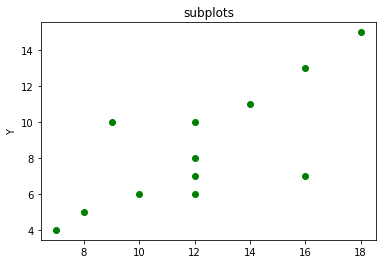

In [1]:
%matplotlib inline

from matplotlib import pyplot as plt

X=[10,7,12,12,9,16,12,18,8,12,14,16]
Y=[6,4,7,8,10,7,10,15,5,6,11,13]

plt.plot(X, Y, 'go')
plt.title('subplots')
plt.ylabel('Y')

plt.show()


```subplots()``` 명령어는 그림 갯수를 인자로 받는다.
행, 열로 인자를 넣으면 격자로 그림을 배치하게 된다. 예를 들어, 인자 ```1,2```는 1행과 2열을 의미한다.
이 명령어는 Figure와 Axes를 반환해서, 그림의 설정을 변경할 수 있다.
```set_minor_locator()```는 작은 구분자를 설정할 수 있고, ```AutoMinorLocator(5)``` 구분자의 갯수를 정한다. 큰 구분자 사이에 4개를 넣으라는 의미이다.
아래 '3'은 구분자 3개를 넣게 된다.

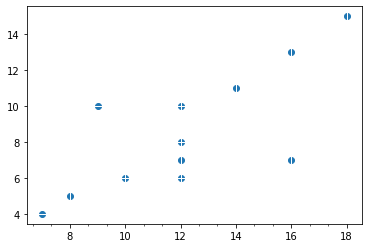

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)
ax.scatter(X, Y)
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(1))
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(3))
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
#fig.show()

### S.10.3 상관관계 식

상관관계는 공분산 covariance를 표준편차의 곱으로 나눈 값으로 계산한다.

Correlation(r) =[ NΣXY - (ΣX)(ΣY) / Sqrt([NΣX2 - (ΣX)2][NΣY2 - (ΣY)2])] 

$$
r_{(x,y)} = \frac {cov(x,y)} {s_x s_y}
$$

$$
cov(x,y)=\frac{ \sum\limits_{i=1}^n (x_i - \bar{x}) (y_i - \bar{y} ) }
                       {n-1}
$$

### S.4.2 데이터

임의로 X, Y 데이터를 생성해보자

In [3]:
X=[2.1,2.5,4.0,3.6]
Y=[8,12,14,10]

X=[10,7,12,12,9,16,12,18,8,12,14,16]
Y=[6,4,7,8,10,7,10,15,5,6,11,13]

### S.4.3 평균 계산

공분산을 구하려면 평균 xbar, ybar를 먼저 구해야 한다.

In [8]:
import numpy as np

xbar=np.mean(X)
ybar=np.mean(Y)

print ("numpy mean of X = {:.3f}".format(xbar))
print ("simple mean of X = {:.3f}".format(float(sum(X))/len(X)))


numpy mean of X = 12.167
simple mean of X = 12.167


### S.4.4 분산 계산

분산은 데이터가 얼마나 흩어져 분포되었는지 보여준다.
* 주의: ddof는 Delta Degrees of Freedom. 기본 값은 ddof=0이지만, 1로 해서 계산함.
* 무작위로 x값을 고르게 되는 경우, n-1로 나누어주어 보정해주어야 함.


In [9]:
print(np.var(X))
print(np.std(X)) # ddof=0
print(np.std(X, ddof=1))

10.472222222222223
3.2360813064912666
3.3799766898963113


수식으로 계산을 해보자.

In [10]:
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/len(X))) # ddof=0
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/(len(X)-1))) # ddof=1

3.2360813064912666
3.3799766898963113


표준편차는 variance의 제곱근으로 계산한다.

In [11]:
sx=np.sqrt(np.var(X,ddof=1))
sy=np.sqrt(np.var(Y,ddof=1))
print("sx:",sx, "sy:",sy)

sx: 3.3799766898963113 sy: 3.3439225741362764


### S.4.5 numpy 공분산 계산

공분산은 계산하면 2 x 2 값을 출력한다.

공분산의 부호는 두 변수가 같은 방향, 다른 방향으로 움직이는지 보여준다.
공분산이 '0'이라면 두 변수가 독립적이란 의미이다.
크기는 해석하기 어렵다.

대각선으로 하나는 x에 대해 ```sum( (x-mean(x))**2) / (n-1)```, 다른 값은 y를 대입해서 계산할 수 있다.
다른 대각선은 ```sum( (x-mean(x))(y-mean(y)) ) / (n-1)```을 의미한다.

In [27]:
print np.sum( (X-np.mean(X))**2) / (len(X)-1)
print np.sum( (Y-np.mean(Y))**2) / (len(Y)-1)
print np.sum( (X-np.mean(X))*(Y-np.mean(Y)) ) / (len(X)-1)

11.4242424242
11.1818181818
8.45454545455


In [28]:
covxy=sum( [ (x-xbar)*(y-ybar) for x,y in zip(X,Y) ]) / (len(X)-1)
print "np cov=",np.cov(X,Y)

print "simple cov=",covxy
print "npcov of X", np.cov(X) #sum( [ (x-xbar)**2 for x in X ])/(len(X)-1)
print "npcov of Y", np.cov(Y)

np cov= [[ 11.42424242   8.45454545]
 [  8.45454545  11.18181818]]
simple cov= 8.45454545455
npcov of X 11.4242424242
npcov of Y 11.1818181818


In [29]:
print(np.var(X, ddof=1))

11.4242424242


상관관계는 공분산을 표준편차의 곱으로 나누어서 계산한다.

In [68]:
rxy=covxy/(sx*sy)
print "corr: ",rxy

corr:  0.748032289676


In [122]:
import math
numer = sum ( [ x*y for x,y in zip(X,Y) ] ) - len(X) * (xbar * ybar)
denom = math.sqrt( (sum( [ x*x for x in X ]) - len(X) * xbar**2) * ( sum( [ y * y for y in Y ]) -len(X) * ybar**2))
print(numer/denom)

0.748032289676


### S.4.6 sklearn

numpy계산과 맞추어 보자.


In [32]:
import scipy.stats as stats
print stats.pearsonr(X,Y)
#(0.66257388220302893, 0.33742611779697101)

(0.74803228967631841, 0.0051443764140137417)


In [33]:
# zscore로 구한 값과 비교
print sum(stats.zscore(X)*stats.zscore(Y))/len(X)

0.748032289676


### S.4.7 zscore를 이용한 상관관계

상관관계는 $$ \sum \frac{z_x . z_y} {N} $$
N은 x,y가 쌍이므로 어느 한 변수의 size를 택해도 같다.

negative란 한 변수가 높을 때 (postive z score) 다른 변수가 낮은 값 (negative z
score)을 갖는 것으로 곱하면 음수가 되게 된다.

* 인과관계를 내포하고 있기는 하지만, 인과관계는 아니다.
담배와 암의 상관관계의 상관관계 높다. 그리고 담배가 암을 유발하는 관계. 그러나
이러한 방향을 말해주는 것은 아니다.
* 선형

어떤 경우에 유의미적?

In [57]:
### correlation from zscores
sum ( [ ( (x-np.mean(X))/np.std(X) ) * ( (y-np.mean(Y))/np.std(Y) ) for x,y in zip(X,Y) ] )

8.9763874761158196

In [58]:
sum (stats.zscore(X) * stats.zscore(Y))
sum (stats.zscore(X) * stats.zscore(Y))/len(X)

0.7480322896763183

## S.5 함수로 만들어 보기

위를 함수로 만들어 보자
우선 for-loop의 특징에 대해 배우자.

In [121]:
import math
numer = sum ( [ x*y for x,y in zip(X,Y) ] ) - len(X) * (xbar * ybar)
denom = math.sqrt( (sum( [ x*x for x in X ]) - len(X) * xbar**2) * ( sum( [ y * y for y in Y ]) -len(X) * ybar**2))
print(numer,denom, numer/denom)

(93.0, 124.32618388738557, 0.74803228967631819)


In [125]:
numer=np.sum(np.array(X)*np.array(Y)) - len(X)*np.mean(X)*np.mean(Y)
denom1=np.sum(np.array(X)*np.array(X)) - len(X)*np.power(np.mean(X),2)
denom2=np.sum(np.array(Y)*np.array(Y)) - len(Y)*np.power(np.mean(Y),2)
denom=np.sqrt(denom1*denom2)
print(numer,denom,numer/denom)

(93.0, 124.32618388738557, 0.74803228967631819)


In [134]:
def pearson(X,Y):
    numer=np.sum(np.array(X)*np.array(Y)) - len(X)*np.mean(X)*np.mean(Y)
    denom1=np.sum(np.array(X)*np.array(X)) - len(X)*np.power(np.mean(X),2)
    denom2=np.sum(np.array(Y)*np.array(Y)) - len(Y)*np.power(np.mean(Y),2)
    denom=np.sqrt(denom1*denom2)
    #print(numer,denom,numer/denom)
    r=1 if denom==0 else numer/denom
    return r

In [135]:
pearson(X,Y)

0.74803228967631819

## S.6 상관관계 표

Using numpy, you could use np.corrcoef:

In [44]:
import numpy as np

a=np.array([0.1, .32, .2, 0.4, 0.8])
b=np.array([.23, .18, .56, .61, .12])
c=np.array([.9, .3, .6, .5, .3])
d=np.array([.34, .75, .91, .19, .21])
            

a,b는 -0.352, a,c는 -0.747, a,d는 -0.489
b,c는 0.238 등 열과 행으로 각 변수의 상관관계 표를 읽을 수 있다.

In [45]:
np.corrcoef([a,b,c,d])

array([[ 1.        , -0.35153114, -0.74736506, -0.48917666],
       [-0.35153114,  1.        ,  0.23810227,  0.15958285],
       [-0.74736506,  0.23810227,  1.        , -0.03960706],
       [-0.48917666,  0.15958285, -0.03960706,  1.        ]])

### scipy.stats



In [ ]:
xx=np.random.normal(0,1,100)
yy=np.random.normal(0,1,100)

Pearson 상관관계는 두 변수의 선형관계를 측정한다.
두 변수는 정규분포를 따르는 것으로 가정한다.
앞은 상관관계를 말하고, 그 다음 값은 p-value이다.

In [36]:
print stats.pearsonr(xx,yy)

(-0.014953544678355404, 0.88260821551981983)


비모수추정 상관관계를 말한다. 두 변수가 정규분포를 따르지 않는 경우에 사용한다.

In [37]:
stats.spearmanr(xx,yy)

SpearmanrResult(correlation=-0.013321332133213319, pvalue=0.89534472782901031)

등위에 의한 상관관계를 계산한다.
1938년 이를 개발한 Maurice Kendall의 이름을 따서 붙였다.

In [38]:
stats.kendalltau(xx,yy)

KendalltauResult(correlation=-0.0068686868686868739, pvalue=0.91934726886031781)

In [39]:
x = [5.05, 6.75, 3.21, 2.66]
y = [1.65, 26.5, -5.93, 7.96]
z = [1.65, 2.64, 2.64, 6.95]

In [40]:
stats.spearmanr(x,y)
#(0.39999999999999997, 0.59999999999999998)

SpearmanrResult(correlation=0.39999999999999997, pvalue=0.59999999999999998)

In [41]:
stats.spearmanr(x,z)
#(-0.63245553203367588, 0.36754446796632423)

SpearmanrResult(correlation=-0.63245553203367599, pvalue=0.36754446796632401)

In [42]:
stats.kendalltau(x,y)
#(0.33333333333333331, 0.49690585901477358)

KendalltauResult(correlation=0.33333333333333331, pvalue=0.49690585901477358)

In [43]:
stats.kendalltau(x,z)
#(-0.54772255750516619, 0.26428835793500238)

KendalltauResult(correlation=-0.54772255750516619, pvalue=0.26428835793500238)

## S.7 Iris

두 변수의 공분산을 표준편차로 나눈 값
the covariance of the two variables divided by the product of their standard deviations.

standardize 표준화란 각 점수를 평균에서 빼고난 후 표준편차로 나누는 것.

$$
   r = \frac{\sum\limits_{i=1}^n (X_i - \bar{X})(Y_i -
   \bar{Y})}{\sqrt{\sum\limits_{i=1}^n (X_i - \bar{X})^2} \sqrt{\sum
   \limits_{i=1}^n (Y_i - \bar{Y})^2}}
$$

## 데이터

Iris 데이터
https://archive.ics.uci.edu/ml/machine-learning-databases/iris/

In [29]:
import pandas as pd

file_name = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

In [30]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
iris1 = sns.load_dataset("iris")
iris1.head()
iris1.count()
iris1.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## statsmodels

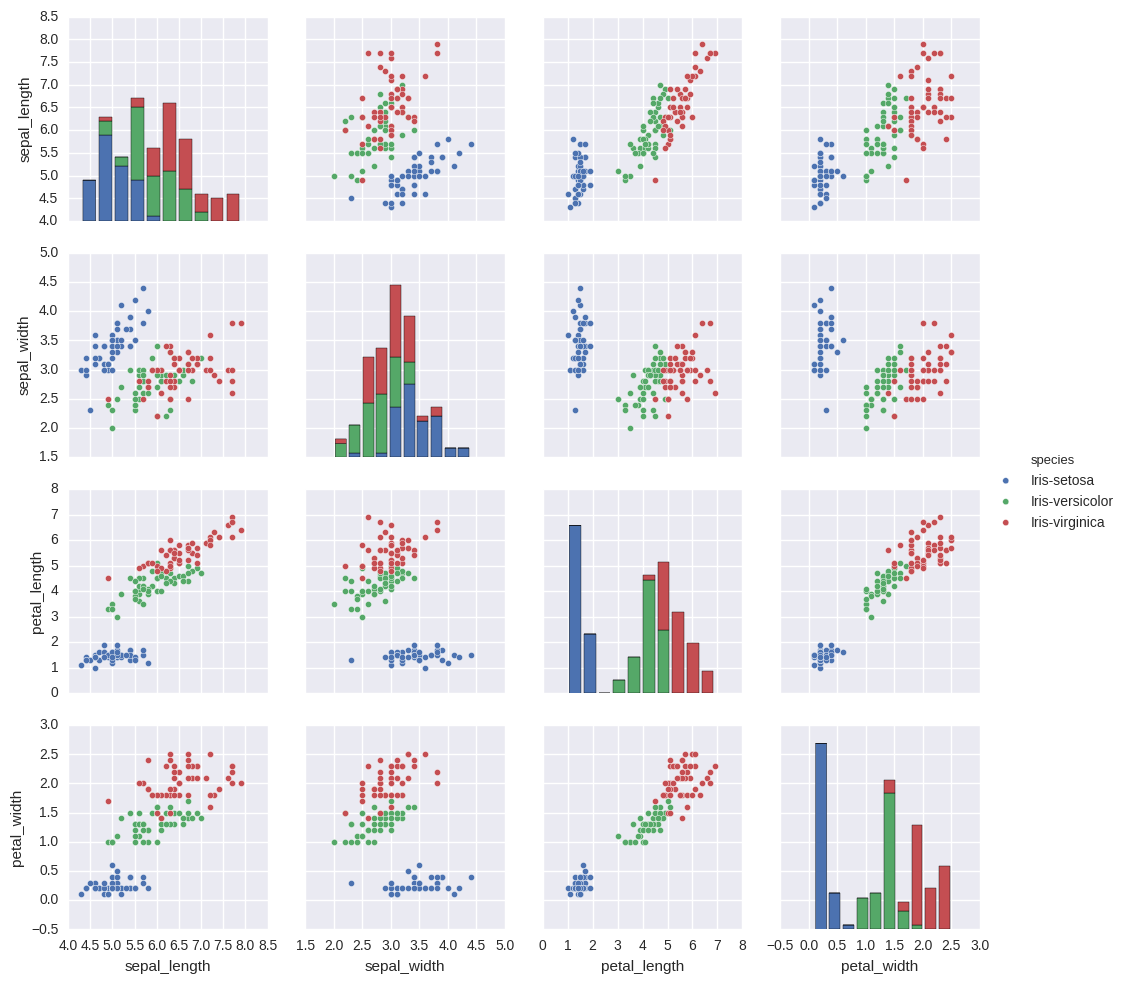

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

#without regression
sns.pairplot(aa, kind="scatter", hue="species")
plt.show()

## spark

In [138]:
import os
import sys 
os.environ["SPARK_HOME"]=os.path.join(os.environ['HOME'],'Downloads','spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [139]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

### 상관관계

* 무작위 수 2 컬럼을 만들어, 상관관계를 계산한다.
* 자신과의 상관관계는 당연히 1.0이 된다.
* spark의 ```rand()``` 함수는 ```pyspark.sql.functions``` 모듈에서 제공된다.

In [6]:
from pyspark.sql.functions import rand
df = spark.range(0, 10).withColumn('rand1', rand(seed=10)).withColumn('rand2', rand(seed=27))
print (df.stat.corr('rand1', 'rand2'))
print (df.stat.corr('id', 'id'))

0.13506684062243296
1.0


Pearson’s Correlation - 정규분포인 경우
Spearman’s Correlation - 정규분포가 아닌 경우

In [7]:
from pyspark.mllib.stat import Statistics
corr_mat=Statistics.corr(features, method="pearson")

NameError: name 'features' is not defined

In [ ]:
corr_mat=Statistics.corr(features, method="spearman")